In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
nadia = cv2.imread('DATA\\Nadia_Murad.jpg',0)
denis = cv2.imread('DATA\\Denis_Mukwege.jpg',0)
solvay = cv2.imread('DATA\\solvay_conference.jpg',0)

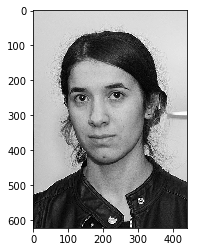

In [6]:
plt.imshow(nadia,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('DATA\\haarcascades\\haarcascade_frontalface_default.xml')

In [8]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255), 10)
    return face_img

In [9]:
result = detect_face(solvay)

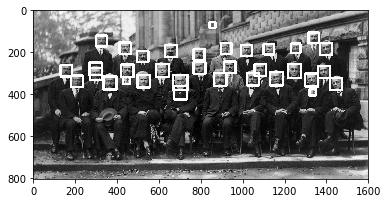

In [10]:
plt.imshow(result,cmap='gray')

In [11]:
def adjusted_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255), 10)
    return face_img

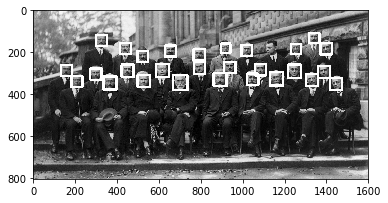

In [12]:
result = adjusted_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [13]:
eye_cascade = cv2.CascadeClassifier('DATA\\haarcascades\\haarcascade_eye.xml')

In [14]:
def detect_eyes(img):
    face_img = img.copy()
    eye_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255), 10)
    return face_img

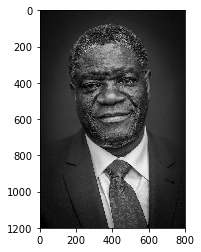

In [15]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [16]:
cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read(0)
    
    frame = adjusted_detect_face(frame)
    
    cv2.imshow('Video detectare fata', frame)
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()